## Importing Libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [254]:
data = pd.read_csv('train.csv', index_col="Item_Identifier")

In [255]:
data.head()

Item_Weight Item_Fat_Content  Item_Visibility  \
Item_Identifier                                                  
FDA15                   9.30          Low Fat         0.016047   
DRC01                   5.92          Regular         0.019278   
FDN15                  17.50          Low Fat         0.016760   
FDX07                  19.20          Regular         0.000000   
NCD19                   8.93          Low Fat         0.000000   

                             Item_Type  Item_MRP Outlet_Identifier  \
Item_Identifier                                                      
FDA15                            Dairy  249.8092            OUT049   
DRC01                      Soft Drinks   48.2692            OUT018   
FDN15                             Meat  141.6180            OUT049   
FDX07            Fruits and Vegetables  182.0950            OUT010   
NCD19                        Household   53.8614            OUT013   

                 Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
Item_Identifier                                                               
FDA15                                 1999      Medium               Tier 1   
DRC01                                 2009      Medium               Tier 3   
FDN15                                 1999      Medium               Tier 1   
FDX07                                 1998         NaN               Tier 3   
NCD19                                 1987        High               Tier 3   

                       Outlet_Type  Item_Outlet_Sales  
Item_Identifier                                        
FDA15            Supermarket Type1          3735.1380  
DRC01            Supermarket Type2           443.4228  
FDN15            Supermarket Type1          2097.2700  
FDX07                Grocery Store           732.3800  
NCD19            Supermarket Type1           994.7052

In [256]:
data.shape

(8523, 11)

## Data Cleaning

In [257]:
data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [258]:
data.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [259]:
data.Item_Weight.fillna(data.Item_Weight.mean(), inplace=True)

In [173]:
data.Outlet_Size.fillna(data.Outlet_Size.mode()[0], inplace=True)

In [174]:
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [175]:
data

Item_Weight Item_Fat_Content  Item_Visibility  \
Item_Identifier                                                  
FDA15                  9.300          Low Fat         0.016047   
DRC01                  5.920          Regular         0.019278   
FDN15                 17.500          Low Fat         0.016760   
FDX07                 19.200          Regular         0.000000   
NCD19                  8.930          Low Fat         0.000000   
...                      ...              ...              ...   
FDF22                  6.865          Low Fat         0.056783   
FDS36                  8.380          Regular         0.046982   
NCJ29                 10.600          Low Fat         0.035186   
FDN46                  7.210          Regular         0.145221   
DRG01                 14.800          Low Fat         0.044878   

                             Item_Type  Item_MRP Outlet_Identifier  \
Item_Identifier                                                      
FDA15                            Dairy  249.8092            OUT049   
DRC01                      Soft Drinks   48.2692            OUT018   
FDN15                             Meat  141.6180            OUT049   
FDX07            Fruits and Vegetables  182.0950            OUT010   
NCD19                        Household   53.8614            OUT013   
...                                ...       ...               ...   
FDF22                      Snack Foods  214.5218            OUT013   
FDS36                     Baking Goods  108.1570            OUT045   
NCJ29               Health and Hygiene   85.1224            OUT035   
FDN46                      Snack Foods  103.1332            OUT018   
DRG01                      Soft Drinks   75.4670            OUT046   

                 Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
Item_Identifier                                                               
FDA15                                 1999      Medium               Tier 1   
DRC01                                 2009      Medium               Tier 3   
FDN15                                 1999      Medium               Tier 1   
FDX07                                 1998      Medium               Tier 3   
NCD19                                 1987        High               Tier 3   
...                                    ...         ...                  ...   
FDF22                                 1987        High               Tier 3   
FDS36                                 2002      Medium               Tier 2   
NCJ29                                 2004       Small               Tier 2   
FDN46                                 2009      Medium               Tier 3   
DRG01                                 1997       Small               Tier 1   

                       Outlet_Type  Item_Outlet_Sales  
Item_Identifier                                        
FDA15            Supermarket Type1          3735.1380  
DRC01            Supermarket Type2           443.4228  
FDN15            Supermarket Type1          2097.2700  
FDX07                Grocery Store           732.3800  
NCD19            Supermarket Type1           994.7052  
...                            ...                ...  
FDF22            Supermarket Type1          2778.3834  
FDS36            Supermarket Type1           549.2850  
NCJ29            Supermarket Type1          1193.1136  
FDN46            Supermarket Type2          1845.5976  
DRG01            Supermarket Type1           765.6700  

[8523 rows x 11 columns]

## Data Visualization

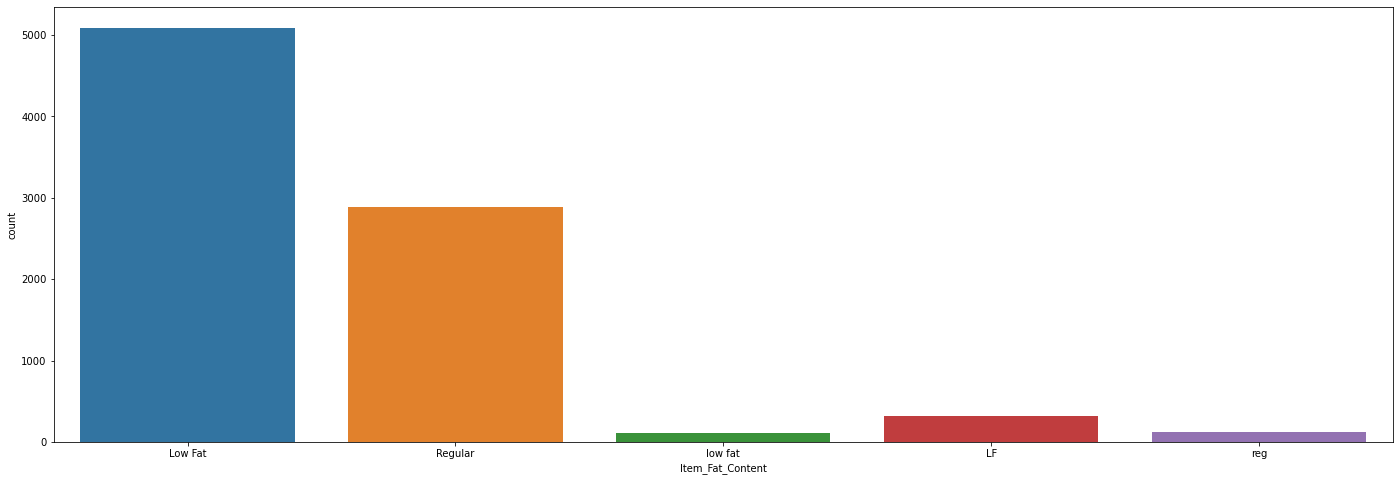

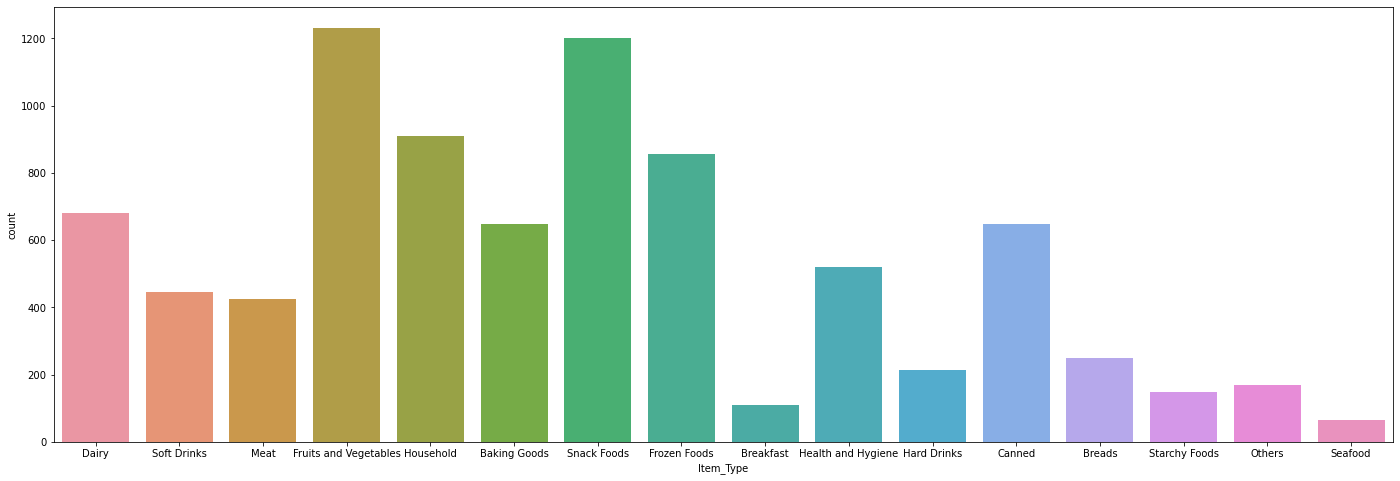

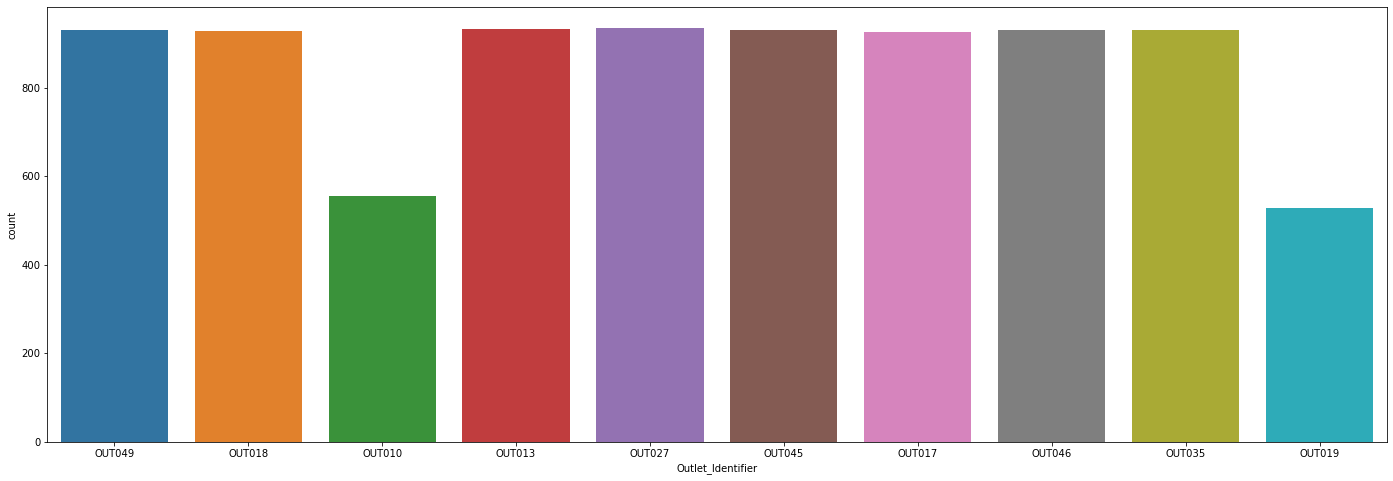

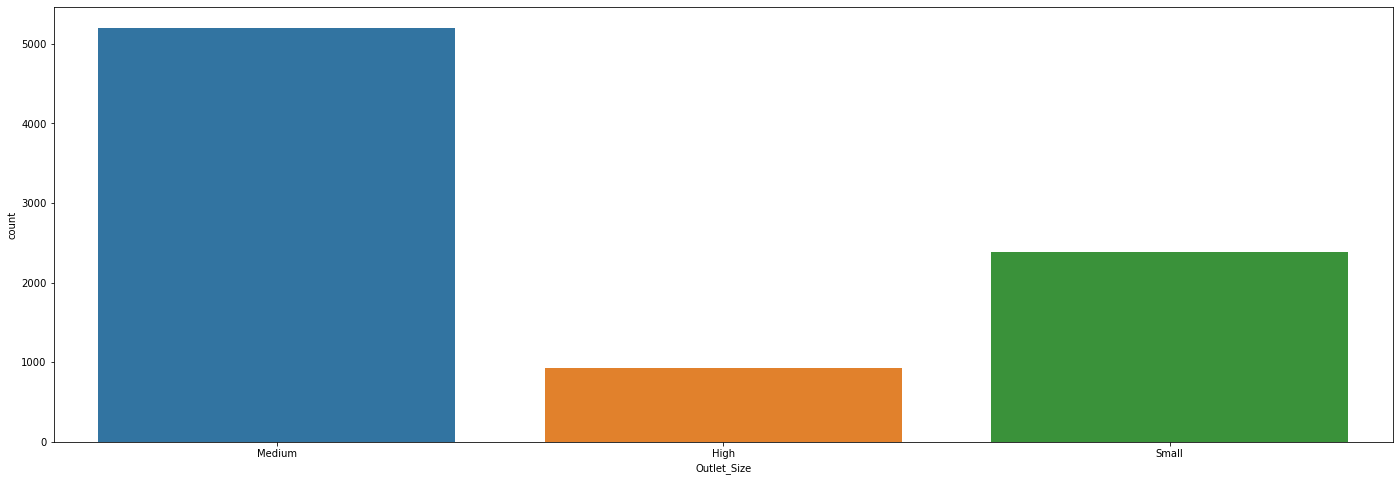

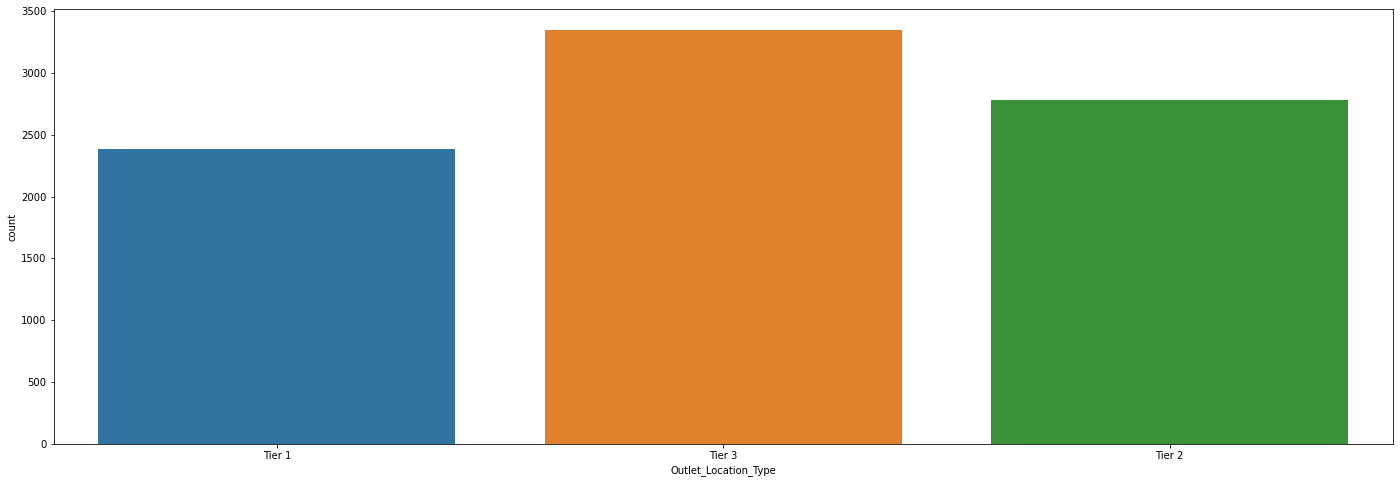

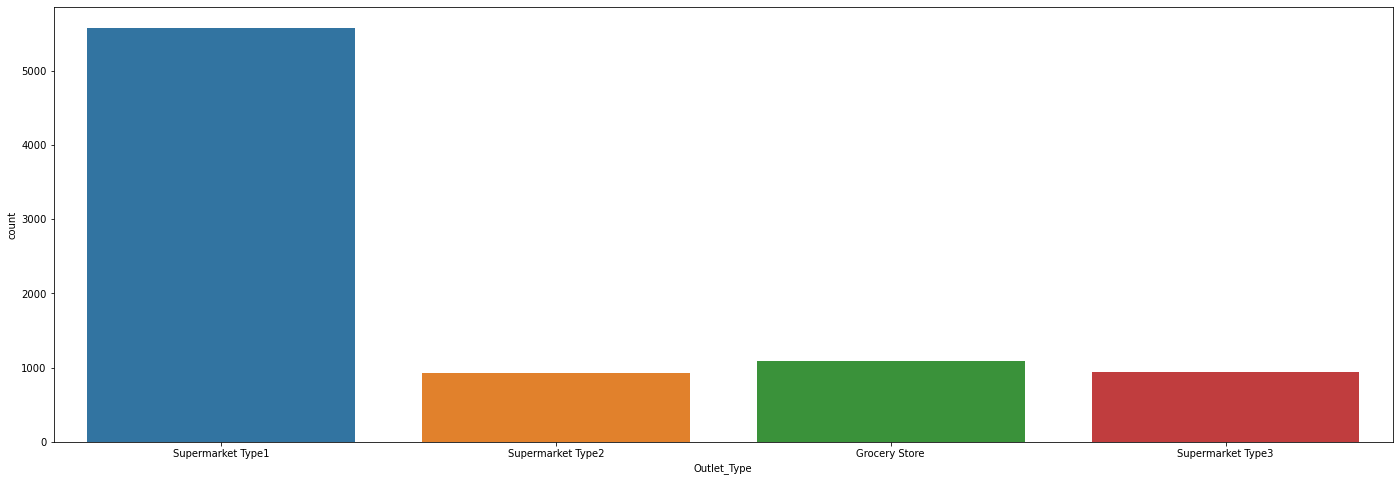

In [176]:
for i in data.columns:
    if data[i].dtypes=='object':
        plt.figure(figsize=(24,8))
        sns.countplot(data=data, x=i)
        plt.show()

## Model Building

In [177]:
data = pd.get_dummies(data)

In [178]:
X = data.drop("Item_Outlet_Sales", axis=1)
y = data.Item_Outlet_Sales

In [179]:
X

Item_Weight  Item_Visibility  Item_MRP  \
Item_Identifier                                           
FDA15                  9.300         0.016047  249.8092   
DRC01                  5.920         0.019278   48.2692   
FDN15                 17.500         0.016760  141.6180   
FDX07                 19.200         0.000000  182.0950   
NCD19                  8.930         0.000000   53.8614   
...                      ...              ...       ...   
FDF22                  6.865         0.056783  214.5218   
FDS36                  8.380         0.046982  108.1570   
NCJ29                 10.600         0.035186   85.1224   
FDN46                  7.210         0.145221  103.1332   
DRG01                 14.800         0.044878   75.4670   

                 Outlet_Establishment_Year  Item_Fat_Content_LF  \
Item_Identifier                                                   
FDA15                                 1999                    0   
DRC01                                 2009                    0   
FDN15                                 1999                    0   
FDX07                                 1998                    0   
NCD19                                 1987                    0   
...                                    ...                  ...   
FDF22                                 1987                    0   
FDS36                                 2002                    0   
NCJ29                                 2004                    0   
FDN46                                 2009                    0   
DRG01                                 1997                    0   

                 Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
Item_Identifier                                                       
FDA15                                   1                         0   
DRC01                                   0                         1   
FDN15                                   1                         0   
FDX07                                   0                         1   
NCD19                                   1                         0   
...                                   ...                       ...   
FDF22                                   1                         0   
FDS36                                   0                         1   
NCJ29                                   1                         0   
FDN46                                   0                         1   
DRG01                                   1                         0   

                 Item_Fat_Content_low fat  Item_Fat_Content_reg  \
Item_Identifier                                                   
FDA15                                   0                     0   
DRC01                                   0                     0   
FDN15                                   0                     0   
FDX07                                   0                     0   
NCD19                                   0                     0   
...                                   ...                   ...   
FDF22                                   0                     0   
FDS36                                   0                     0   
NCJ29                                   0                     0   
FDN46                                   0                     0   
DRG01                                   0                     0   

                 Item_Type_Baking Goods  ...  Outlet_Size_High  \
Item_Identifier                          ...                     
FDA15                                 0  ...                 0   
DRC01                                 0  ...                 0   
FDN15                                 0  ...                 0   
FDX07                                 0  ...                 0   
NCD19                                 0  ...                 1   
...                                 ...  ...               ...   
FDF22                                 0  ...         

## Linear Regression

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [182]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [183]:
y_prediction =  LR.predict(X_test)

In [184]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_prediction, squared=False)

1102.7185762836214

## Polynomial Regression

In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train)

PR = LinearRegression()
PR.fit(X_poly, y_train)

y_prediction =  LR.predict(X_test)
mean_squared_error(y_test, y_prediction, squared=False)

1102.7185762836214

## Ridge Regression

In [186]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

rg = Ridge(alpha=34.0)
rg.fit(X_train,y_train)

y_prediction = rg.predict(X_test)

mean_squared_error(y_test, y_prediction, squared=False)

1101.6836354311454

## Lasso Regression

In [187]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

ls = Lasso(alpha=3)
ls.fit(X_train,y_train)

y_prediction = ls.predict(X_test)

mean_squared_error(y_test, y_prediction, squared=False)

1100.3836033763966

## Decission Tree Regression

In [188]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=6)
dtr.fit(X_train,y_train)

y_prediction = dtr.predict(X_test)
mean_squared_error(y_test, y_prediction, squared=False)

1513.8802558324217

## Random Forest Regression

In [231]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=5, random_state=5)
rfr.fit(X_train,y_train)

y_prediction = rfr.predict(X_test)
mean_squared_error(y_test, y_prediction, squared=False)

1058.6759922059673

## Solution

In [232]:
res = {}

In [233]:
sol = pd.read_csv('test.csv', index_col="Item_Identifier")

In [234]:
sol.head()

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
Item_Identifier                                                               
FDW58                 20.750          Low Fat         0.007565  Snack Foods   
FDW14                  8.300              reg         0.038428        Dairy   
NCN55                 14.600          Low Fat         0.099575       Others   
FDQ58                  7.315          Low Fat         0.015388  Snack Foods   
FDY38                    NaN          Regular         0.118599        Dairy   

                 Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
Item_Identifier                                                          
FDW58            107.8622            OUT049                       1999   
FDW14             87.3198            OUT017                       2007   
NCN55            241.7538            OUT010                       1998   
FDQ58            155.0340            OUT017                       2007   
FDY38            234.2300            OUT027                       1985   

                Outlet_Size Outlet_Location_Type        Outlet_Type  
Item_Identifier                                                      
FDW58                Medium               Tier 1  Supermarket Type1  
FDW14                   NaN               Tier 2  Supermarket Type1  
NCN55                   NaN               Tier 3      Grocery Store  
FDQ58                   NaN               Tier 2  Supermarket Type1  
FDY38                Medium               Tier 3  Supermarket Type3

In [235]:
res["Item_Identifier"] = sol.index

In [236]:
sol.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [237]:
res

{'Item_Identifier': Index(['FDW58', 'FDW14', 'NCN55', 'FDQ58', 'FDY38', 'FDH56', 'FDL48', 'FDC48',
        'FDN33', 'FDA36',
        ...
        'FDA01', 'NCH42', 'FDF46', 'DRL35', 'FDW46', 'FDB58', 'FDD47', 'NCO17',
        'FDJ26', 'FDU37'],
       dtype='object', name='Item_Identifier', length=5681)}

In [238]:
sol.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [239]:
sol.Item_Weight.fillna(sol.Item_Weight.mean(), inplace=True)

In [240]:
sol.Outlet_Size.fillna(sol.Outlet_Size.mode()[0], inplace=True)

In [241]:
sol.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

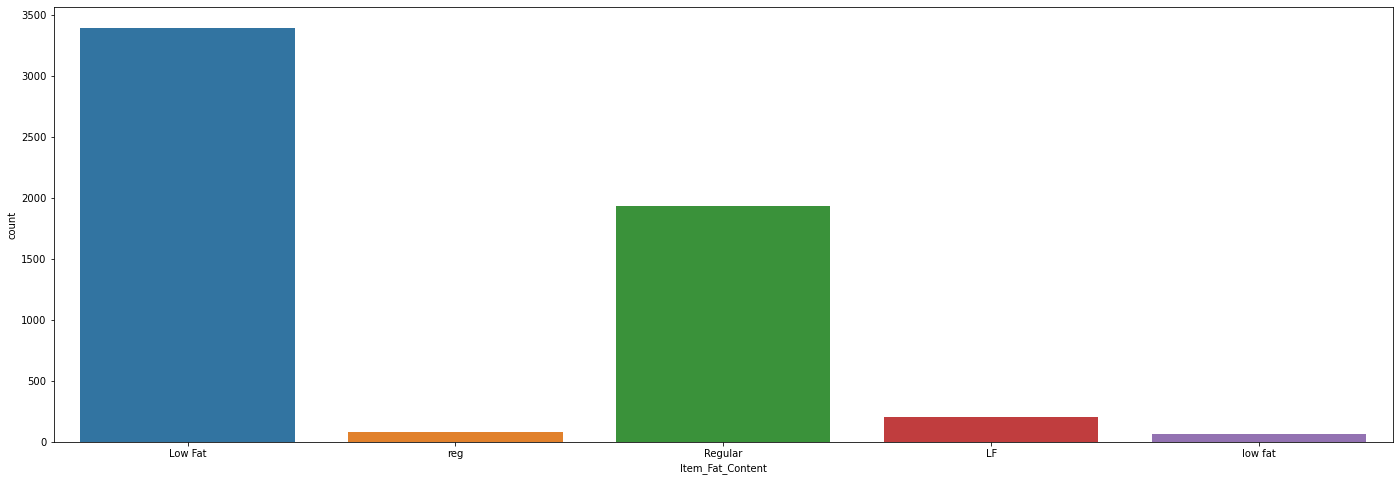

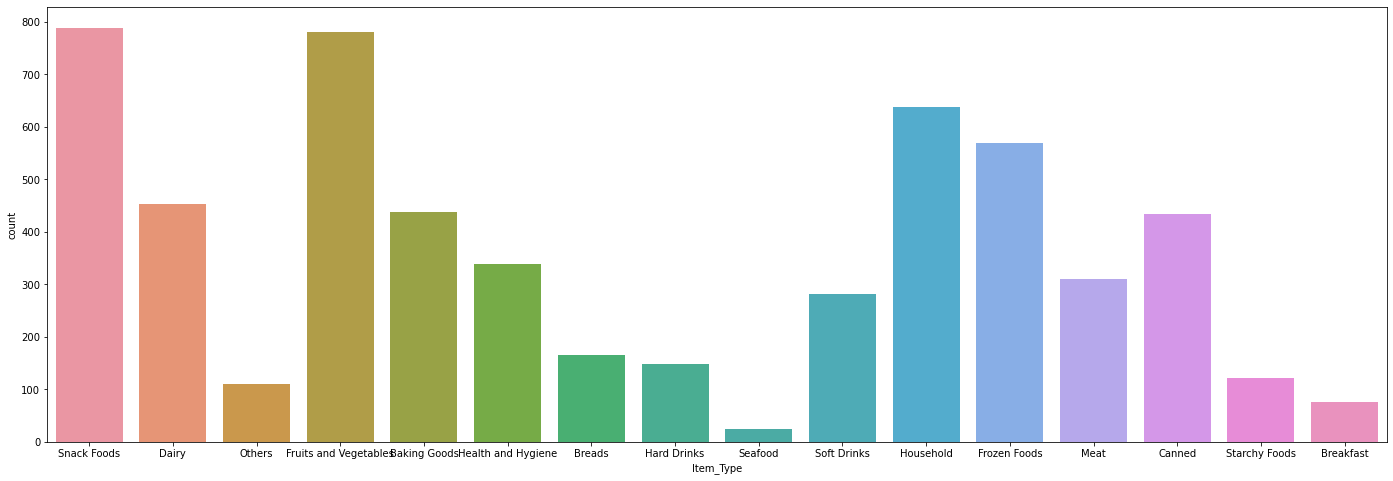

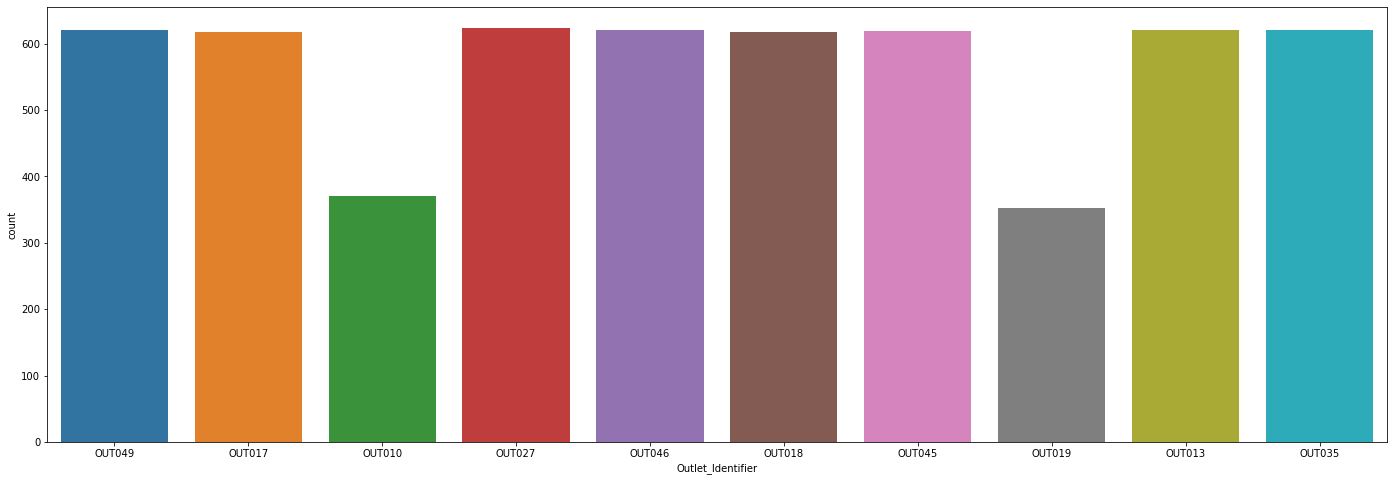

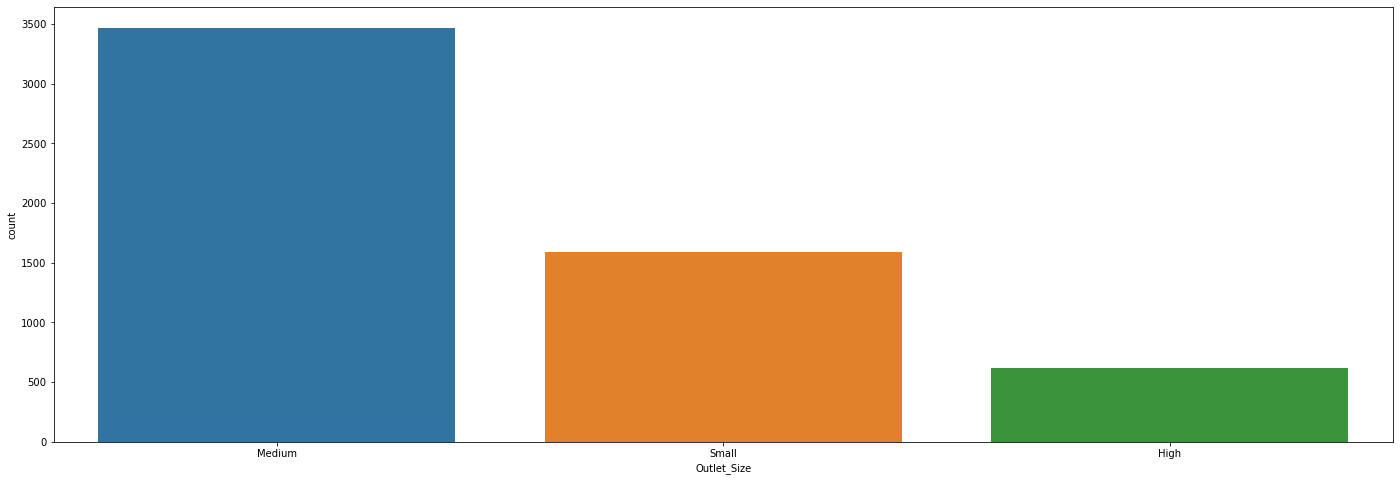

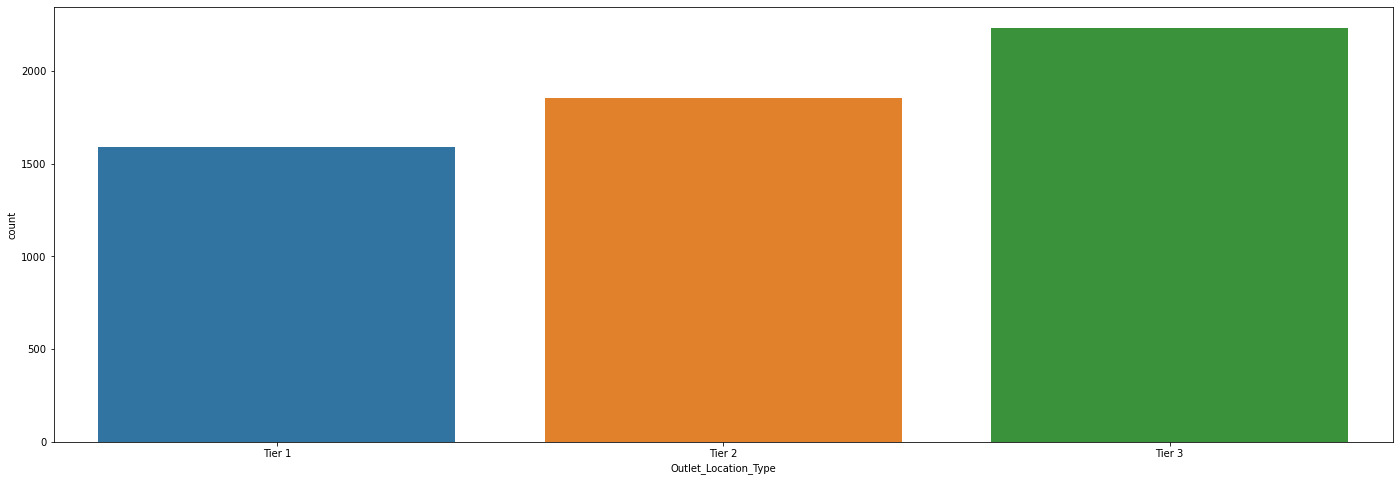

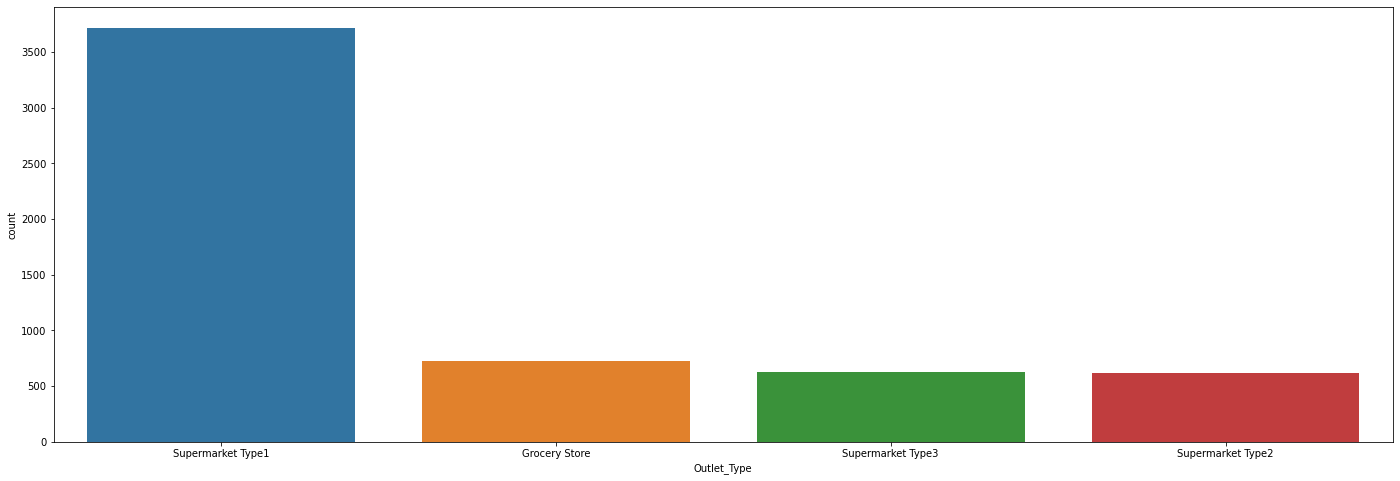

In [242]:
for i in sol.columns:
    if sol[i].dtypes=='object':
        plt.figure(figsize=(24,8))
        sns.countplot(data=sol, x=i)
        plt.show()

In [243]:
res["Outlet_Identifier"] = sol.Outlet_Identifier

In [244]:
sol = pd.get_dummies(sol)

In [245]:
y = rfr.predict(sol)

In [246]:
# y = ls.predict(sol)

In [247]:
c = 0
for i in y:
    if i<0:
        c+=1
        print(i)

In [248]:
c

0

In [249]:
res["Item_Outlet_Sales"] = y

In [260]:
# res

In [251]:
pd.DataFrame(res).to_csv('result.csv', index=False)